In [1]:
import sys
import os
ROOT_DIR = os.path.abspath("/MoStress/")
sys.path.append(ROOT_DIR)

In [2]:
from os.path import join
import json
from moStress.neuralNetwork.MoStressNeuralNetwork import MoStressNeuralNetwork
from utils.preprocessingCheckpoint import getPreprocessingCheckpoint
from models.EvaluateModel import EvaluateModel

In [ ]:
MODEL_T0_TEST = "BASELINE-RESERVOIR"

In [3]:
moStressJsonFilePath = join("..", "configs","moStressConfigs.json")

with open(moStressJsonFilePath, 'r') as j:
        moStressConfigs = json.loads(j.read())

In [4]:
trainData, validationData = getPreprocessingCheckpoint()

In [5]:
dataset = {
    "features": trainData["features"],
    "targets": trainData["targets"],
    "weights": trainData["weights"],
}

In [6]:
moStressNeuralNetwork = MoStressNeuralNetwork(moStressConfigs, dataset)

2022-09-13 19:58:19.571730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
moStressNeuralNetwork.execute(
    MODEL_T0_TEST,
    "none",
    "reservoir"
)

Starting MoStress with model: BASELINE-RESERVOIR-NONE.


Compiling model with optimizer: none


Model Compiled


Fitting Model


Setting Reservoir Nodes with Input Data...


Fitting output nodes


Model Fitted

\Saving Model


Model Saved



In [8]:
evaluator = EvaluateModel(
    { "features": validationData["features"], "targets": validationData["targets"] },
    MODEL_T0_TEST,
    moStressNeuralNetwork.model,
)

Evaluating MoStress with model: BASELINE-RESERVOIR

Classification Report


Setting Reservoir Nodes with Input Data...


Returning Predictions

              precision    recall  f1-score   support

    Baseline     0.6220    0.9129    0.7399      8016
      Stress     0.7642    0.5043    0.6076      4523
   Amusement     0.0047    0.0004    0.0008      2423

    accuracy                         0.6416     14962
   macro avg     0.4636    0.4725    0.4494     14962
weighted avg     0.5650    0.6416    0.5802     14962



Confusion Matrix



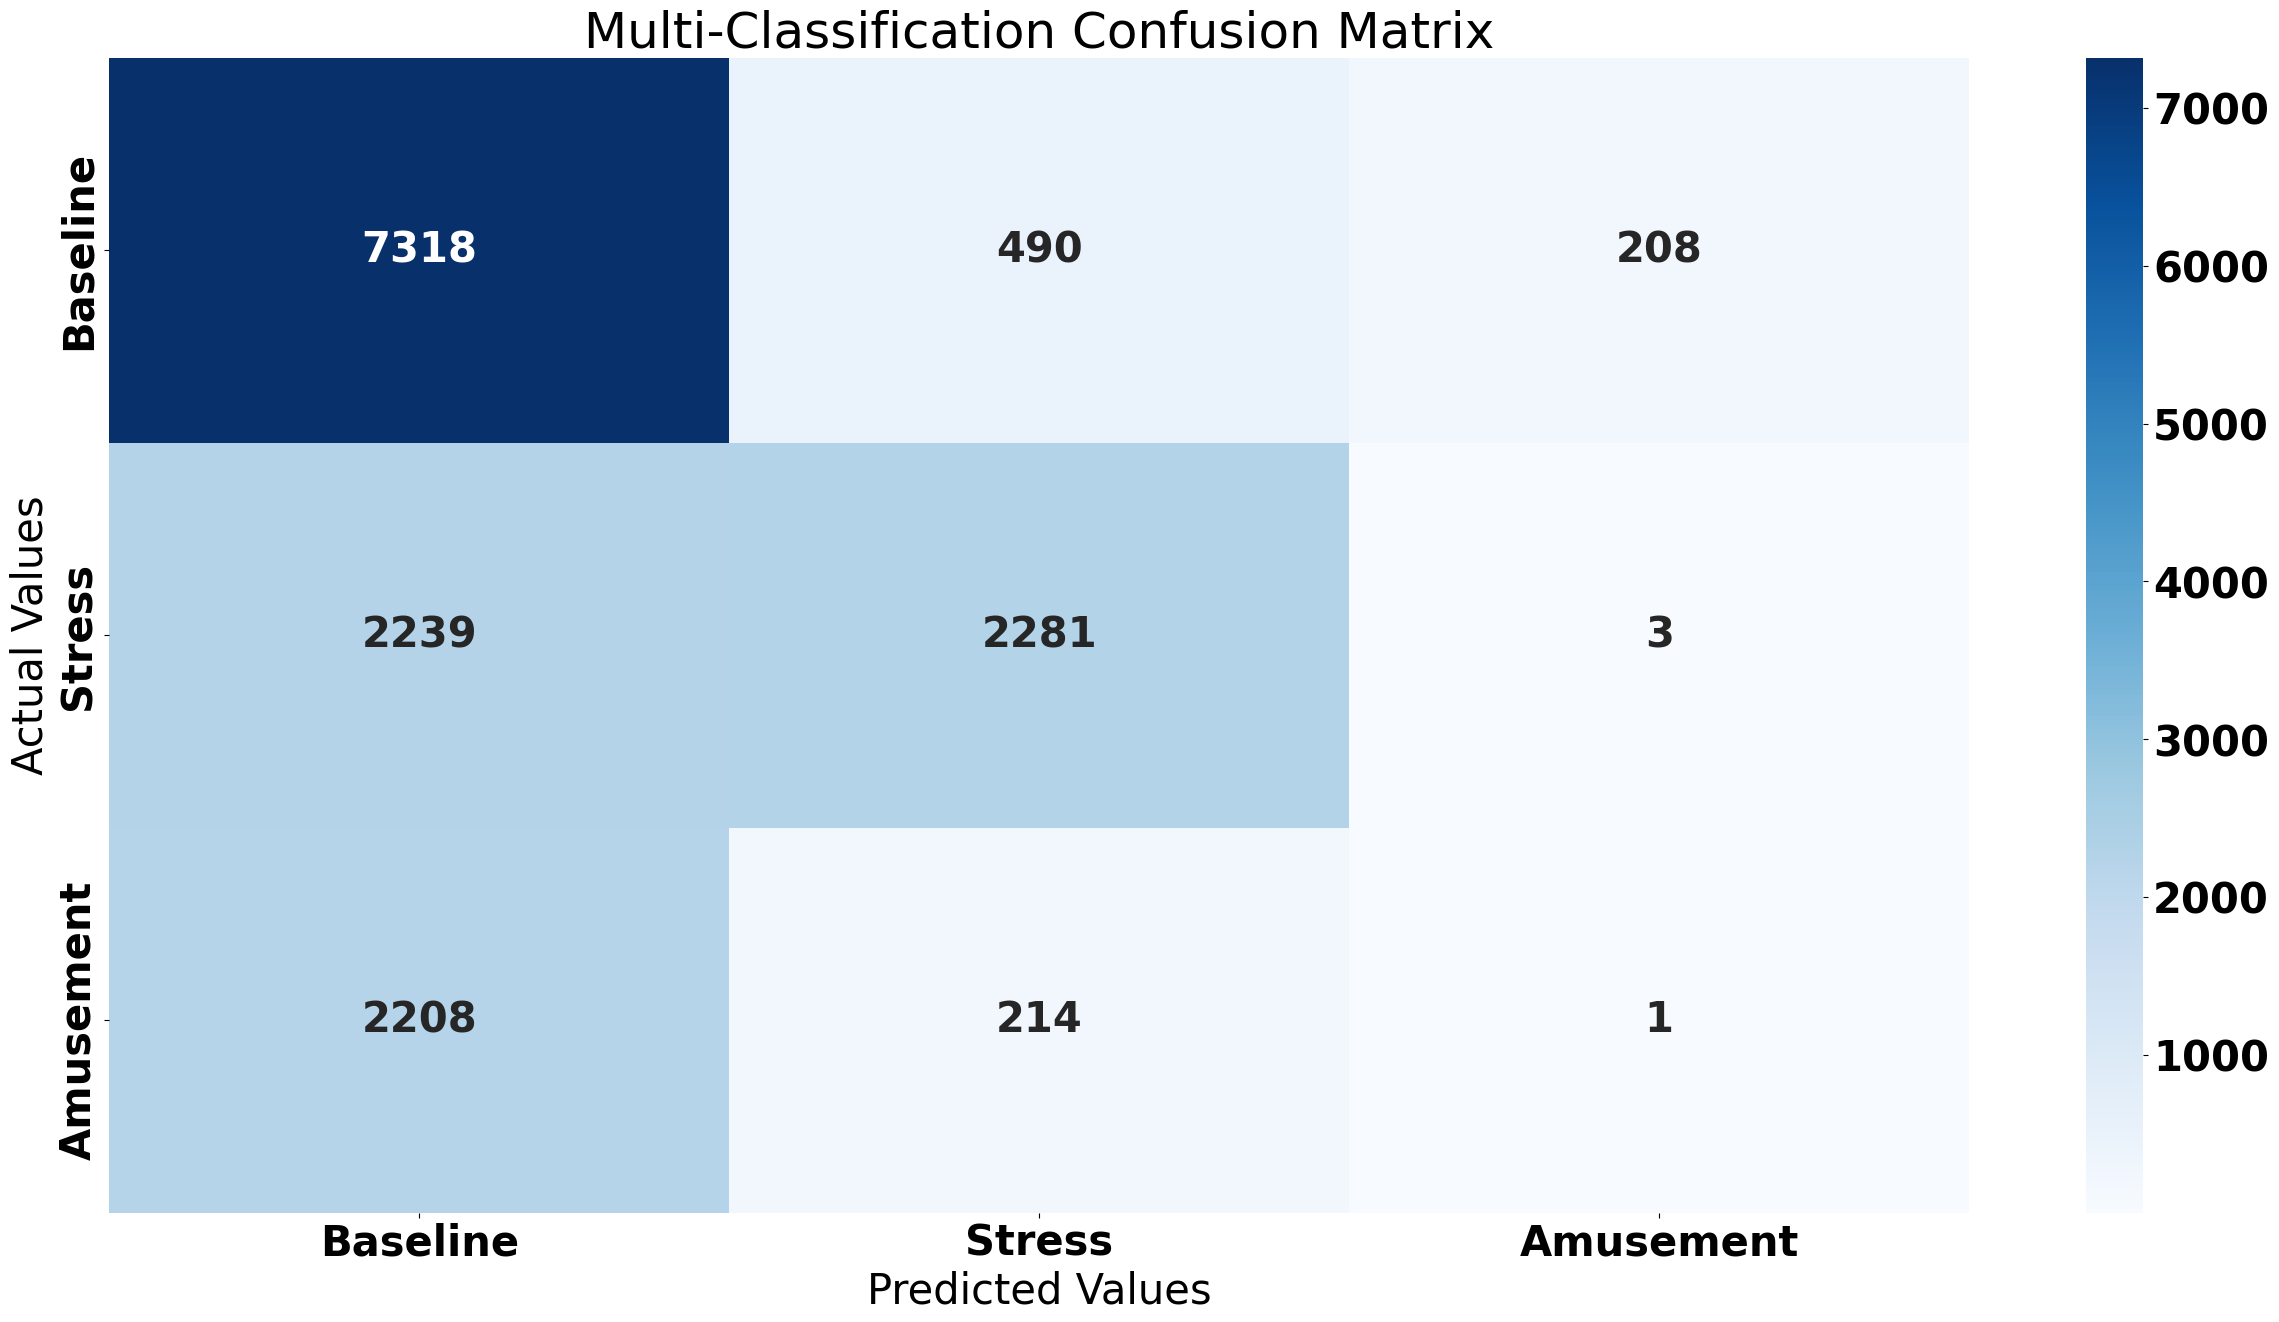

In [9]:
evaluator.executeEvaluation()